In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
import matplotlib.pyplot as plt


In [2]:
from keras.datasets import cifar10
(train_img, train_lab),(test_img, test_lab) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(train_img.shape)
print(test_img.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


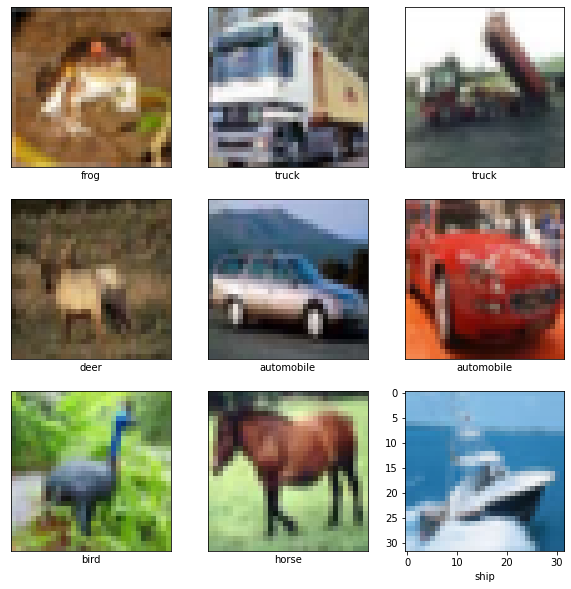

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
  plt.xticks([])
  plt.yticks([])
  plt.subplot(3,3,i+1)
  plt.imshow(train_img[i])
  plt.xlabel(class_names[train_lab[i][0]])

plt.show()

In [5]:
print(train_img[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [6]:
train_img = train_img / 255.0
test_img = test_img / 255.0

In [7]:
print(train_img[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
model= Sequential()
model.add(Conv2D(64,(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation = "relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [9]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [10]:
history = model.fit(train_img, train_lab, epochs=10, validation_data=(test_img, test_lab))
model.save('cifar.h5')

Epoch 1/10
1563/1563 [==============================] - 174s 111ms/step - loss: 1.4555 - accuracy: 0.4736 - val_loss: 1.1513 - val_accuracy: 0.5950
Epoch 2/10
1563/1563 [==============================] - 166s 106ms/step - loss: 1.1211 - accuracy: 0.6052 - val_loss: 1.0165 - val_accuracy: 0.6488
Epoch 3/10
1563/1563 [==============================] - 165s 106ms/step - loss: 1.0019 - accuracy: 0.6501 - val_loss: 0.9656 - val_accuracy: 0.6633
Epoch 4/10
1563/1563 [==============================] - 165s 105ms/step - loss: 0.9263 - accuracy: 0.6781 - val_loss: 0.9233 - val_accuracy: 0.6804
Epoch 5/10
1563/1563 [==============================] - 162s 104ms/step - loss: 0.8649 - accuracy: 0.6993 - val_loss: 0.8763 - val_accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 164s 105ms/step - loss: 0.8093 - accuracy: 0.7164 - val_loss: 0.8515 - val_accuracy: 0.7076
Epoch 7/10
1563/1563 [==============================] - 163s 105ms/step - loss: 0.7708 - accuracy: 0.7320 - val_

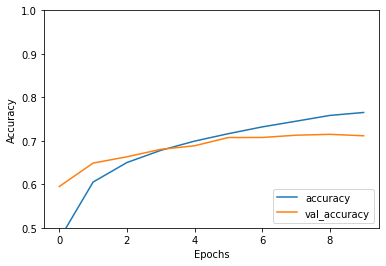

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc = 'lower right')